In [ ]:
# Nome aluno 1: Gabriel de Lima Miranda
# RA aluno 1: 22304286

# Nome aluno 2: Armando Vítor Oliveira de Lima
# RA aluno 2: 22301333

# Nome aluno 3:
# RA aluno 3:

# **Instruções para a Prova**

**Antes de iniciar, preencha o Nome e RA no bloco de código acima.**

### **Envio da Prova por apenas 1 integrante do grupo no formulário** https://forms.gle/TM3Lb9Cia2tk64Gy6

A prova deve ser realizada e enviada seguindo estas diretrizes:

**Não renomei o arquivo. Deve ser enviado com o nome "``Prova 1.ipynb``"**

1. **Composição do Grupo:**
   - A prova pode ser realizada individualmente ou em grupos de até 3 integrantes.

2. **Consultas:**
   - É permitido consultar materiais das aulas anteriores e anotações próprias.

3. **Integridade Acadêmica:**
   - Será atribuída nota zero à prova de alunos que forem flagrados compartilhando código com outros grupos, utilizando o Google ou Chat GPT durante a prova.
   - Alunos que enviarem prova de fraude acadêmica por outros grupos, mediante prova fotográfica enviada por e-mail, receberão nota máxima (SS). A identidade do informante será mantida em sigilo.

4. **Intervalo:**
   - Não haverá intervalos. Após a finalização da prova, o aluno estará livre para sair.

5. **Entrega da Prova:**
   - A prova deve ser entregue mantendo todos os blocos de markdown e de código originais, sem adicionar blocos adicionais. Blocos de código extras podem ser usados durante o desenvolvimento, mas a versão final deve conter apenas os blocos fornecidos inicialmente.
   - Todas as saídas dos blocos de código devem ser mantidas no envio (Ex: As métricas e o Gráfico)

6. **Atenção:**
   - Respostas corretas colocadas nas seções erradas não serão consideradas. É essencial colocar cada resposta na seção correspondente à sua questão.

**Boa sorte!**


# Importe todas as bibliotecas no bloco de código abaixo
- Cada bibliotecas importada e não utilizada irá reduzir meio ponto da nota.
- Cada bibliotecas importada mais de uma vez irá reduzir meio ponto da nota.
- Cada bibliotecas importada fora do bloco de código abaixo irá reduzir meio ponto da nota.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, CSVLogger, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, f1_score, confusion_matrix
import numpy as np
import seaborn as sns

# 1 - Leia a base 'dados_corretor_imoveis.csv' e faça o tratamento de dados descrito abaixo:

In [ ]:
dados_corretor_imoveis = pd.read_csv('dados_corretor_imoveis.csv')

- A - Crie uma coluna chamada "vendido" com valor `0` se o valor de status for `for_sale` e `1` se for `sold`. (apague a coluna status)



In [ ]:
dados_corretor_imoveis['vendido'] = dados_corretor_imoveis['status'].apply(lambda x: 1 if x == 'sold' else 0)

dados_corretor_imoveis.drop(columns=['status'], inplace=True)

- B - Tire todas as casas decimais das colunas numéricas



In [ ]:
colunas_numericas = dados_corretor_imoveis.select_dtypes(include=['float64', 'int64']).columns

dados_corretor_imoveis[colunas_numericas] = dados_corretor_imoveis[colunas_numericas].round(0)

- C - Crie uma coluna binária (0 ou 1) para cada um dos 10 estados mais frequentes na "coluna ", identifique primeiramente os 10 estados com maior número de ocorrências. Em seguida, para cada um desses estados, crie uma nova coluna no DataFrame, nomeando-a com o nome do estado, e atribua o valor 1 se a casa estiver nesse estado e 0 caso contrário. Casas localizadas fora desses 10 estados devem ter o valor 0 em todas essas novas colunas. Finalize removendo a coluna "estado" do DataFrame.

In [ ]:
top_10_estados = dados_corretor_imoveis['estado'].value_counts().head(10).index.tolist()

for estado in top_10_estados:
    dados_corretor_imoveis[estado] = (dados_corretor_imoveis['estado'] == estado).astype(int)

for estado in dados_corretor_imoveis['estado'].unique():
    if estado not in top_10_estados:
        dados_corretor_imoveis[estado] = 0

dados_corretor_imoveis.drop(columns=['estado'], inplace=True)

- D - Separe os dados em X (os atributos) e y (a coluna valor)



In [ ]:
X = dados_corretor_imoveis.drop(columns=['valor'])
y = dados_corretor_imoveis['valor']

- E - Separe os dados em treinamento (30%), validação (20%) e teste (50%).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

- F - Normalize  os dados com Standard Scale

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# 2 Defina e compile um modelo para prever o valor com as seguintes caracterìsticas:
- Para o modelo:
    - Tenha 5 camadas ocultas, respectivamente com 128, 64, 32, 16 e 8 neurônios;
    - Use a função de ativaçao Tangente Hiperbólica nas camadas ocultas;
- Para a compilação do modelo:
    - O Otimizador rmsprop;
    - O loss adequado para o tipo de previsão;
    - A métrica de erro médio absoluto;
- Chame o modelo de "`model_1`";

In [ ]:
model_1 = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1)
])

model_1.compile(optimizer=RMSprop(),
                loss=MeanAbsoluteError(),
                metrics=['mae'])

# 3 - Treinamento do modelo:
- Defina os callbacks:
    - para reduzir a taxa de aprendizado com fator de 0.3, paciência de 3 e valor mínimo para 0.000001, monitorando o loss de validação;
    - Parada antecipada do modelo se ficar 10 épocas sem melhorar o loss de validação
- Treine o modelo por 20 épocas;
- Passe 256 amostras por vez na rede;
- Use os dados de validação;
- Use os calbacks definidos;
- Coloque para mostrar as épocas dutante o treinamento;
- Salve os dados históricos do treinamento para posterior análise.

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
csv_logger = CSVLogger('training_log.csv')

history = model_1.fit(X_train_scaled, y_train,
                      epochs=20,
                      batch_size=256,
                      validation_data=(X_validation_scaled, y_validation),
                      callbacks=[reduce_lr, early_stopping, csv_logger],
                      verbose=1)

Epoch 1/20
1070/1070 [==============================] - 7s 5ms/step - loss: 561516.6875 - mae: 561516.6875 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 2/20
1070/1070 [==============================] - 4s 4ms/step - loss: 561506.8125 - mae: 561506.8125 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 3/20
1064/1070 [============================>.] - ETA: 0s - loss: 561650.0000 - mae: 561650.0000
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1070/1070 [==============================] - 4s 4ms/step - loss: 561497.6250 - mae: 561497.6250 - val_loss: nan - val_mae: nan - lr: 0.0010
Epoch 4/20
1070/1070 [==============================] - 5s 5ms/step - loss: 561491.1250 - mae: 561491.1250 - val_loss: nan - val_mae: nan - lr: 3.0000e-04
Epoch 5/20
1070/1070 [==============================] - 4s 4ms/step - loss: 561488.0625 - mae: 561488.0625 - val_loss: nan - val_mae: nan - lr: 3.0000e-04
Epoch 6/20
1066/1070 [============================>.] - ETA: 0s - los

# 4 - Exiba os valores de loss e erro médio absoluto de validação e treinamento ao longo das épocas.

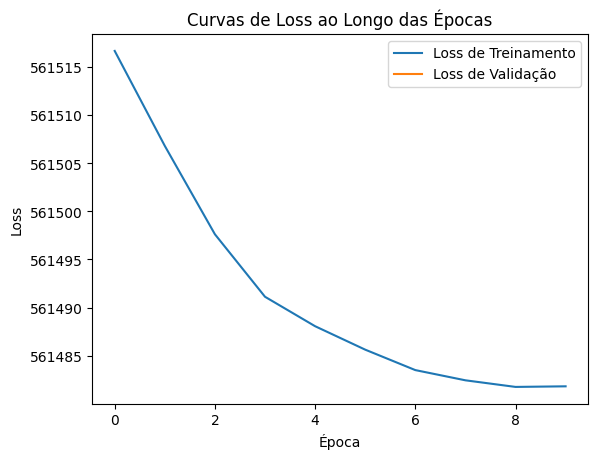

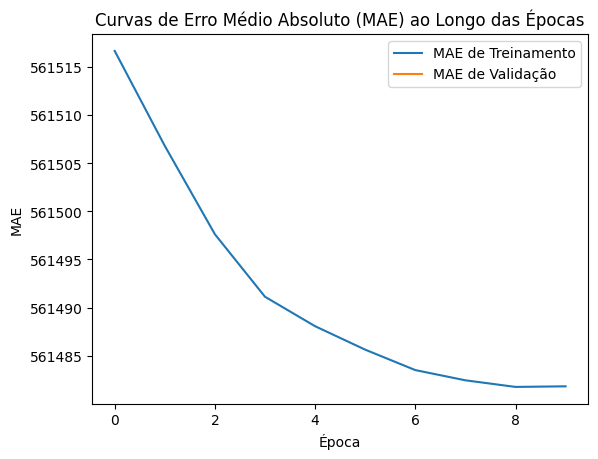

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(train_loss, label='Loss de Treinamento')
plt.plot(val_loss, label='Loss de Validação')
plt.title('Curvas de Loss ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_mae, label='MAE de Treinamento')
plt.plot(val_mae, label='MAE de Validação')
plt.title('Curvas de Erro Médio Absoluto (MAE) ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.show()

# 5 - Calcule o MSE, RMSE e MAE para os dados de teste.
- Adeque os valores para que as métricas sejam geradas com os valores reais.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Extra Valendo 1 ponto:
- Crie um gráfico comparando os valores reais e valores preditos;
- Para o gráfico ficar viável, utilize apenas as primeiras 200 amostras;
- Para melhorar a visualização do gráfico, coloque os dados em ordem crescente pelo valor real.

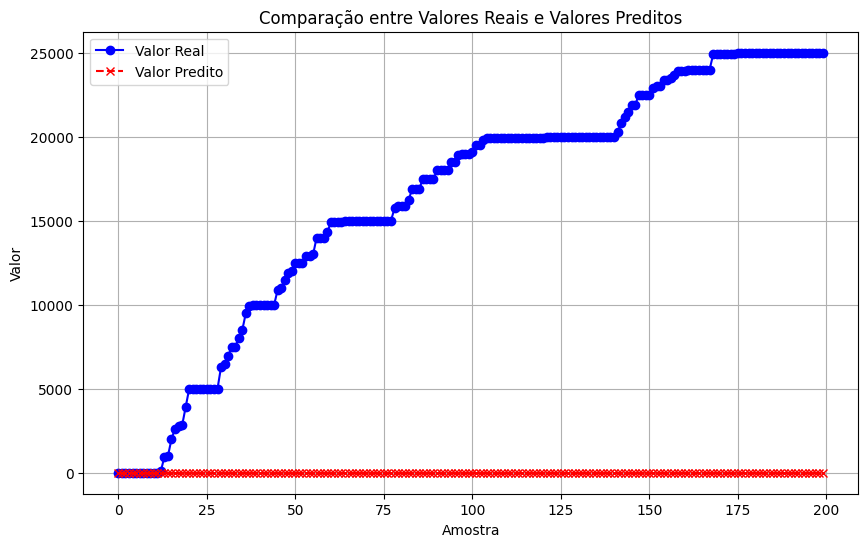

In [ ]:
sorted_indices = np.argsort(y_test)[:200]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_sorted)), y_test_sorted, label='Valor Real', marker='o', linestyle='-', color='blue')
plt.plot(np.arange(len(y_test_sorted)), y_pred_sorted, label='Valor Predito', marker='x', linestyle='--', color='red')
plt.title('Comparação entre Valores Reais e Valores Preditos')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# 6 - Leia a base de dados metaverse_transactions_dataset.csv e faça o tratamento de dados abaixo:


In [ ]:
metaverse_transactions = pd.read_csv('metaverse_transactions_dataset.csv')

- A - Apague as colunas timestamp, sending_address, receiving_address e purchase_pattern


In [ ]:
metaverse_transactions.drop(columns=['timestamp', 'sending_address', 'receiving_address', 'purchase_pattern'], inplace=True)

- B - Transforme as colunas location_region e ip_prefix, com get dummies ou one_hot _encoder (ou com o loc) de forma a criar uma coluna binária para cada possível valor. Por fim apague as colunas originais (se ainda existirem)


In [ ]:
if 'location_region' in metaverse_transactions.columns and 'ip_prefix' in metaverse_transactions.columns:
    metaverse_transactions = pd.get_dummies(metaverse_transactions, columns=['location_region', 'ip_prefix'])

    metaverse_transactions.drop(columns=['location_region', 'ip_prefix'], inplace=True)

- C - Transforme a coluna age_group em numérica transformando os valores new para 0, established para 1 e veteran 22


In [ ]:
age_group_mapping = {'new': 0, 'established': 1, 'veteran': 22}
metaverse_transactions['age_group'] = metaverse_transactions['age_group'].map(age_group_mapping)

- D - Transforme a coluna anomaly em numérica transformando os valores low_risk para 0, moderate_risk para 1 e high_risk 2

In [ ]:
anomaly_mapping = {'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2}
metaverse_transactions['anomaly'] = metaverse_transactions['anomaly'].map(anomaly_mapping)

- E - Separe os dados em X e y (transaction_type)

In [ ]:
X = metaverse_transactions.drop(columns=['transaction_type'])
y = metaverse_transactions['transaction_type']

- F - Separe os dados em treinamento (70%), validação (15%) e teste (15%)

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

- G - Normalize os dados com MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- H - Transforme os dados de y para se adequar a uma classificação multiclasse

In [ ]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# 7 Defina e compile um modelo para prever o tipo da transação com as seguintes características:
- Para o modelo:
    - Tenha 6 camadas ocultas, respectivamente com 64, 64, 64, 32, 16 e 8 neurônios;
    - Use a função de ativaçao relu nas camadas ocultas;
- Para a compilação do modelo:
    - O Otimizador adam;
    - O loss adequado para o tipo de previsão;
    - A métrica de acurácia;
- Chame o modelo de "`model_2`";

In [ ]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 8 - Treinamento do modelo:
- Defina os callbacks:
    - para reduzir a taxa de aprendizado com fator de 0.35, paciência de 4 e valor mínimo para 0.00001, monitorando a acurácia de validação;
    - Parada antecipada do modelo se ficar 15 épocas sem melhorar o loss de validação
- Treine o modelo por 150 épocas;
- Passe 128 amostras por vez na rede;
- Use os dados de validação;
- Use os calbacks definidos;
- Coloque para mostrar as épocas dutante o treinamento;
- Salve os dados históricos do treinamento para posterior análise.

In [ ]:
reduce_lr = ReduceLROnPlateau(factor=0.35, patience=4, min_lr=0.00001, monitor='val_accuracy')
early_stopping = EarlyStopping(patience=15, monitor='val_loss')
model_checkpoint = ModelCheckpoint('model_2.h5', save_best_only=True)

history = model_2.fit(X_train_scaled, y_train_encoded,
                      validation_data=(X_val_scaled, y_val_encoded),
                      epochs=150,
                      batch_size=128,
                      callbacks=[reduce_lr, early_stopping, model_checkpoint],
                      verbose=1)

Epoch 1/150
430/430 [==============================] - 7s 5ms/step - loss: 0.7786 - accuracy: 0.6562 - val_loss: 0.3881 - val_accuracy: 0.8217 - lr: 0.0010
Epoch 2/150
 40/430 [=>............................] - ETA: 1s - loss: 0.3434 - accuracy: 0.8469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


430/430 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.8873 - val_loss: 0.1851 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/150
430/430 [==============================] - 1s 3ms/step - loss: 0.1773 - accuracy: 0.9196 - val_loss: 0.1619 - val_accuracy: 0.9249 - lr: 0.0010
Epoch 4/150
430/430 [==============================] - 2s 5ms/step - loss: 0.1538 - accuracy: 0.9305 - val_loss: 0.1498 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 5/150
430/430 [==============================] - 2s 4ms/step - loss: 0.1443 - accuracy: 0.9341 - val_loss: 0.1389 - val_accuracy: 0.9373 - lr: 0.0010
Epoch 6/150
430/430 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9394 - val_loss: 0.1214 - val_accuracy: 0.9451 - lr: 0.0010
Epoch 7/150
430/430 [==============================] - 2s 4ms/step - loss: 0.1312 - accuracy: 0.9409 - val_loss: 0.1273 - val_accuracy: 0.9417 - lr: 0.0010
Epoch 8/150
430/430 [==============================] - 2s 4ms/step - loss: 0

# 9 - Exiba os valores de loss e acurácia de validação e treinamento ao longo das épocas.

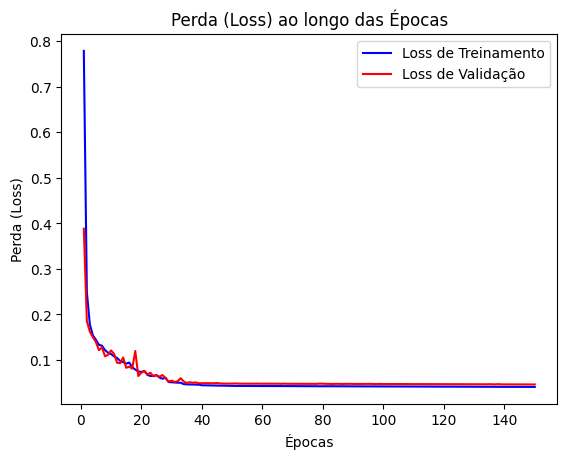

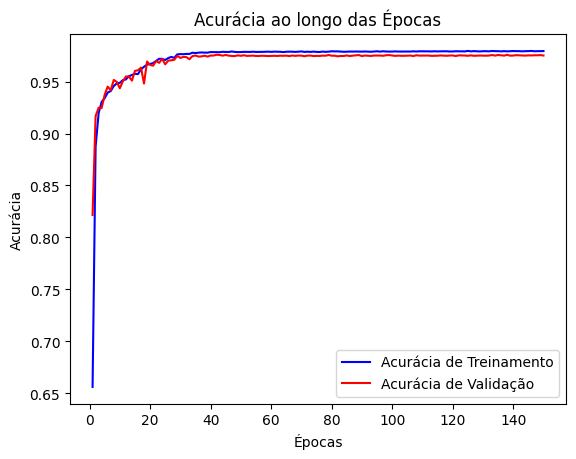

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Loss de Treinamento')
plt.plot(epochs, val_loss, 'r', label='Loss de Validação')
plt.title('Perda (Loss) ao longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy, 'b', label='Acurácia de Treinamento')
plt.plot(epochs, val_accuracy, 'r', label='Acurácia de Validação')
plt.title('Acurácia ao longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# 10 - Exiba as métricas de validaçao do modelo abaixo:

In [ ]:
val_loss, val_accuracy = model_2.evaluate(X_val_scaled, y_val_encoded)

print(f'Acurácia de Validação: {val_accuracy:.4f}')
print(f'Perda (Loss) de Validação: {val_loss:.4f}')

369/369 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9751
Acurácia de Validação: 0.9751
Perda (Loss) de Validação: 0.0461


- A - Relatório de Classificação


In [ ]:
y_val_pred_prob = model_2.predict(X_val_scaled)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

print(classification_report(y_val_encoded, y_val_pred))

369/369 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       392
           1       0.99      0.98      0.99      3736
           2       0.99      0.99      0.99      3827
           3       0.77      0.93      0.84       562
           4       1.00      1.00      1.00      3275

    accuracy                           0.98     11792
   macro avg       0.92      0.90      0.90     11792
weighted avg       0.98      0.98      0.97     11792



- B - F1 Score


In [ ]:
f1score = f1_score(y_val_encoded, y_val_pred, average='weighted')

print("F1 Score:", f1score)

F1 Score: 0.9743845323821286


- C - Matriz de confusão com gráfico de calor

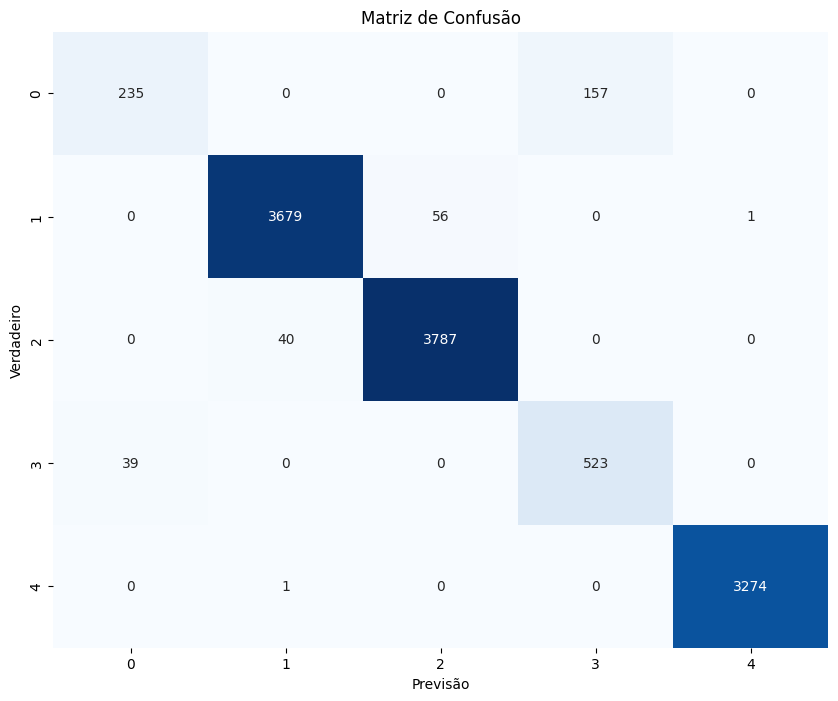

In [ ]:
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()